In [26]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
def corr_sep(im, h, v):
    # Convolution with separable kernel (k=h v^T) of odd dimensions
    # I am assuming symmetric boundary conditions (consistent with boundary='symm'
    # in scipy.signal.convolve2d)
    tmp = [[0]*len(im[0]) for _ in range(len(im))]
    out = [[0]*len(im[0]) for _ in range(len(im))]
    n_prev_v = len(v)/2.0
    n_prev_h = len(h)/2.0
    
    # Vertical conv first, save in tmp
    for i in range(len(im)):
        for j in range(len(im[0])):        
            for ix, k in enumerate(range(i-math.floor(n_prev_v), i+math.ceil(n_prev_v))):
                if k < len(im):
                    tmp[i][j] += im[abs(k)-(k<0)][j] * v[ix]
                else:
                    tmp[i][j] += im[len(im)-k-1][j] * v[ix]

    # Horiziontal next, save in out
    for i in range(len(im)):
        for j in range(len(im[0])):        
            for ix, k in enumerate(range(j-math.floor(n_prev_h), j+math.ceil(n_prev_h))):
                if k < len(im[0]):
                    out[i][j] += tmp[i][abs(k)-(k<0)] * h[ix] # double count edge
                else:
                    out[i][j] += tmp[i][len(im[0])-k-1] * h[ix]
    return out

def conv_gaussian(im, radius, variance):
    k_1d = np.exp(np.arange(-radius, radius+1)**2 / (2*variance))
    k_1d /= k_1d.sum()
    k_1d = list(k_1d)
    return corr_sep(im, k_1d, k_1d)

In [110]:
np.random.seed(12094515)
N = 100
img = (np.random.rand(N,N)>0.85)*1.0
l_im = list(list(i) for i in img)
vf = np.ones(3)
hf = np.ones(5)
k = np.ones((3,5))

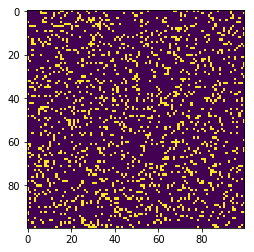

In [111]:
plt.imshow(img)

In [118]:
res = np.array(conv_gaussian(img, 6, 1))

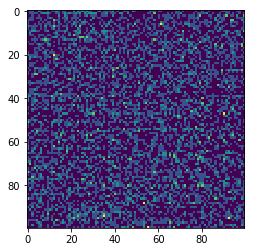

In [119]:
plt.imshow(res)